##### WIKI DATA ANALYSE
- [Huggingface/wikimedia/wikipedia](https://huggingface.co/datasets/wikimedia/wikipedia)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
DATA_DIR = '/data/ephemeral/level2-nlp-generationfornlp-nlp-14-lv3/data/'
wiki = pd.read_csv(DATA_DIR + 'filtered_wikipedia.csv')
wiki.head()

,id,url,title,text
0,20,https://ko.wikipedia.org/wiki/%EB%82%98%EB%9D%...,나라 목록,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...
1,34,https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%...,대한민국 제16대 대통령 선거,대한민국 제16대 대통령 선거는 2002년 12월 19일 목요일 치뤄진 대통령 선거...
2,79,https://ko.wikipedia.org/wiki/%EB%82%98%EB%9D%...,나라 이름순 수도 목록,국\n\nㄱ \n\n 가나 - 아크라 \n 가봉 - 리브르빌\n 가이아나 - 조지타...
3,246,https://ko.wikipedia.org/wiki/%EC%A4%91%EA%B5%...,중국의 역사,"중국의 역사(中國史, )에 대한 최초의 기록은 기원전 1250년 무정의 통치기인 상..."
4,249,https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%...,대한민국,"대한민국(, , ROK), 약칭 한국(, ), 남한(, ), 남조선()은 동아시아의..."


In [23]:
wiki['text_length'] = wiki['text'].str.len()
wiki['text_length'].describe()

count     19132.000000
mean       1523.015106
std        3651.011528
min           7.000000
25%         217.000000
50%         516.000000
75%        1306.000000
max      119984.000000
Name: text_length, dtype: float64

In [37]:
#1000자 단위로 나누기
wiki['text_length_bins'] = (wiki['text_length'] // 1000) * 1000

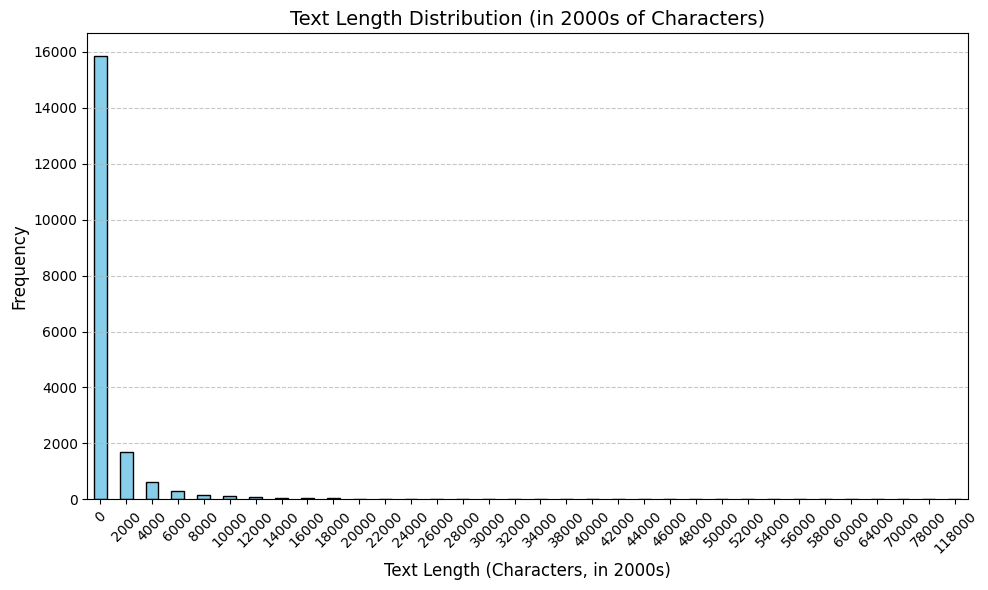

In [22]:
# 분포 시각화
plt.figure(figsize=(10, 6))
wiki['text_length_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Text Length Distribution (in 2000s of Characters)', fontsize=14)
plt.xlabel('Text Length (Characters, in 2000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [38]:
data_0_5000 = wiki[wiki['text_length'] <= 5000]
data_5001_10000 = wiki[(wiki['text_length'] > 5000) & (wiki['text_length'] <= 10000)]
data_10000_plus = wiki[wiki['text_length'] > 10000]

In [39]:
def plot_distribution(data, title):
    plt.figure(figsize=(8, 5))
    data['text_length'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
    plt.title(title, fontsize=14)
    plt.xlabel('Text Length (Characters)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

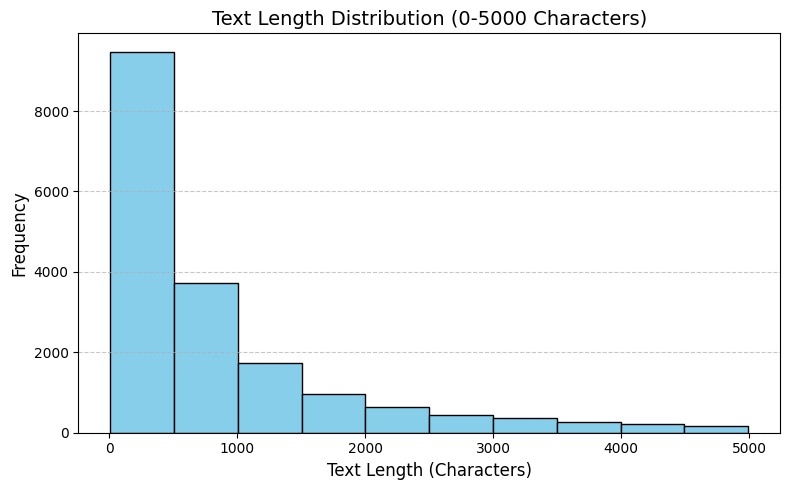

In [40]:
plot_distribution(data_0_5000, 'Text Length Distribution (0-5000 Characters)')

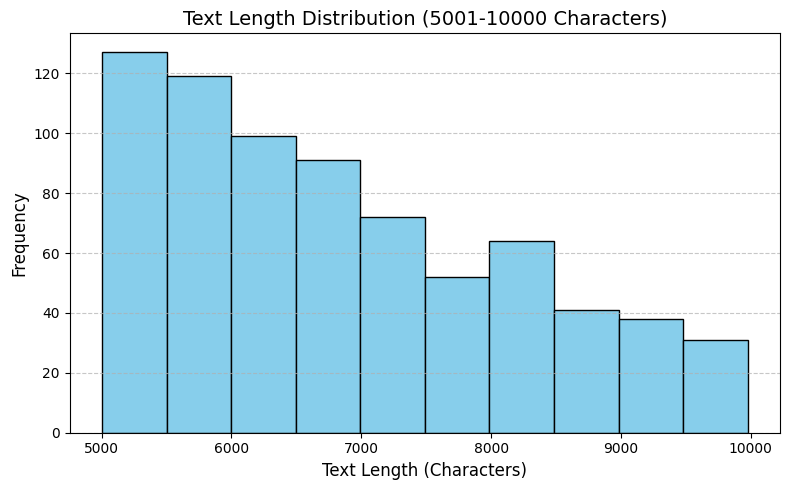

In [41]:
plot_distribution(data_5001_10000, 'Text Length Distribution (5001-10000 Characters)')

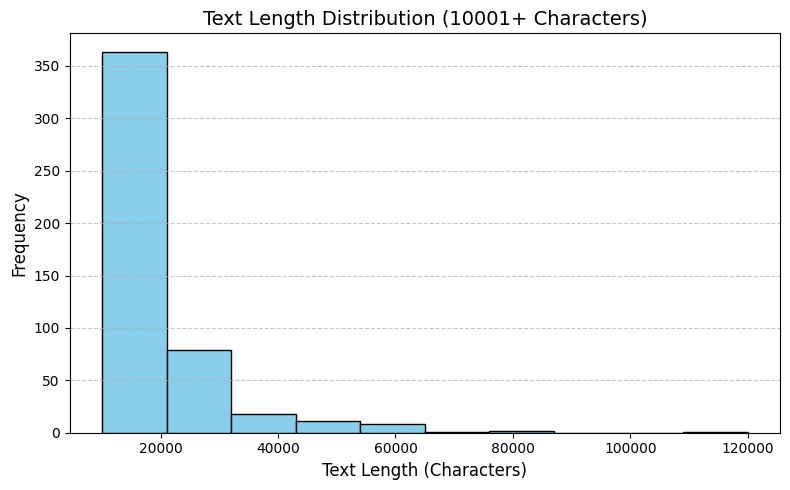

In [42]:
plot_distribution(data_10000_plus, 'Text Length Distribution (10001+ Characters)')

In [44]:
length_counts = wiki['text_length_bins'].value_counts().sort_index()

In [45]:
print(length_counts)

text_length_bins
0         13155
1000       2705
2000       1077
3000        618
4000        360
5000        246
6000        191
7000        126
8000        106
9000         65
10000        67
11000        60
12000        53
13000        37
14000        25
15000        25
16000        25
17000        23
18000        21
19000        13
20000        14
21000        10
22000        12
23000         9
24000        10
25000         8
26000         3
27000         7
28000         9
29000         2
30000         3
31000         6
32000         2
33000         3
34000         1
35000         5
38000         2
39000         2
41000         1
42000         2
43000         1
44000         2
45000         2
47000         1
48000         1
49000         1
50000         1
52000         1
53000         1
54000         1
55000         2
57000         1
58000         2
61000         1
64000         1
70000         1
79000         2
119000        1
Name: count, dtype: int64
